In [24]:
import pandas as pd 
import matplotlib as plt
import numpy as np 
from operator import itemgetter

In [25]:
df = pd.read_csv("vgsales.csv")
df.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [26]:
df_n = df.copy()

In [27]:
df_n = df_n.dropna()
cols = list(df_n.columns)
df_na = {col: list(pd.isna(df_n[col])).count(True) for col in cols}
df_na

{'Rank': 0,
 'Name': 0,
 'Platform': 0,
 'Year': 0,
 'Genre': 0,
 'Publisher': 0,
 'NA_Sales': 0,
 'EU_Sales': 0,
 'JP_Sales': 0,
 'Other_Sales': 0,
 'Global_Sales': 0}

In [28]:
from operator import itemgetter

In [29]:
platf_data = [(name, df_n["Platform"].to_list().count(name)) 
                  for name in df_n["Platform"].unique() ]
platf_data = sorted(platf_data, key=itemgetter(1))
pl_data = platf_data[:-8:-1]
pl_data

[('DS', 2131),
 ('PS2', 2127),
 ('PS3', 1304),
 ('Wii', 1290),
 ('X360', 1234),
 ('PSP', 1197),
 ('PS', 1189)]

<AxesSubplot:xlabel='platforms'>

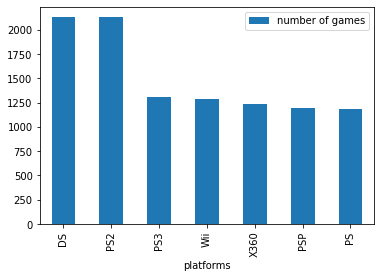

In [30]:
cases = []
platforms = []
for i in range(len(pl_data)):
    platforms.append(pl_data[i][0])
    cases.append(pl_data[i][1])

platform_info = pd.DataFrame({"platforms": platforms, "number of games": cases})
platform_info.plot.bar(x="platforms", y="number of games")

In [31]:
import numpy as np

Text(0, 0.5, 'Sales')

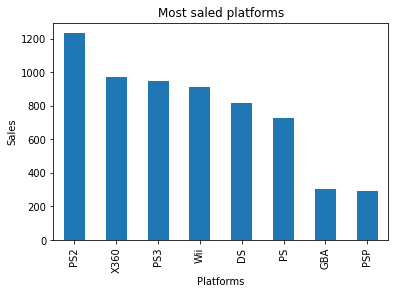

In [10]:
pl_sales = df_n.groupby(["Platform"])["Global_Sales"].agg(np.sum)

fig = pl_sales.sort_values(ascending=False)[:8].plot.bar()
fig.set_title("Most saled platforms")
fig.set_xlabel("Platforms")
fig.set_ylabel("Sales")

Text(0.5, 0, 'Year')

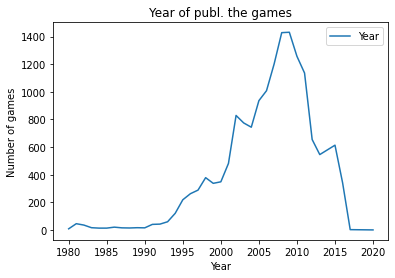

In [32]:
year_data = {year: df_n["Year"].to_list().count(year) for year in set(df_n["Year"])}
year_df = pd.DataFrame.from_dict(data=year_data, orient="index", columns=["Year"])

fig = year_df.plot()
fig.set_title("Year of publ. the games")
fig.set_ylabel("Number of games")
fig.set_xlabel("Year")

Text(0, 0.5, 'Sales')

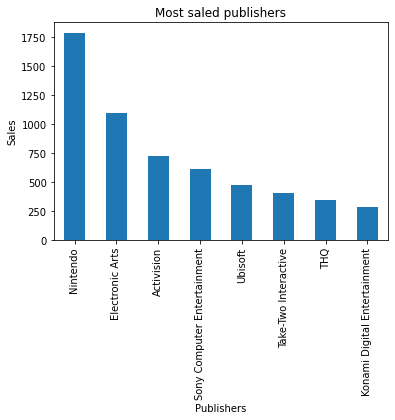

In [33]:
publisher_sales = df_n.groupby(["Publisher"])["Global_Sales"].agg(np.sum)

fig = publisher_sales.sort_values(ascending=False)[:8].plot.bar()
fig.set_title("Most saled publishers")
fig.set_xlabel("Publishers")
fig.set_ylabel("Sales")

In [42]:
df_n.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [35]:
df_n["Global_Sales"][df_n.Global_Sales < 1].count()

14233

In [51]:
df_ps = df_n[(df_n["Platform"] == "PS") | (df_n["Platform"] == "PS2") | (df_n["Platform"] == "PS3")]
df_ps.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
16,17,Grand Theft Auto V,PS3,2013.0,Action,Take-Two Interactive,7.01,9.27,0.97,4.14,21.40
17,18,Grand Theft Auto: San Andreas,PS2,2004.0,Action,Take-Two Interactive,9.43,0.40,0.41,10.57,20.81
24,25,Grand Theft Auto: Vice City,PS2,2002.0,Action,Take-Two Interactive,8.41,5.49,0.47,1.78,16.15
28,29,Gran Turismo 3: A-Spec,PS2,2001.0,Racing,Sony Computer Entertainment,6.85,5.09,1.87,1.16,14.98
34,35,Call of Duty: Black Ops II,PS3,2012.0,Shooter,Activision,4.99,5.88,0.65,2.52,14.03


In [70]:
df_ps = df_ps.sort_index().sort_values("Year", kind='mergesort')
df_ps.head(10)

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
1567,1569,Battle Arena Toshinden,PS,1994.0,Fighting,Sony Computer Entertainment,0.39,0.26,0.53,0.08,1.27
2601,2603,Ridge Racer,PS,1994.0,Racing,Sony Computer Entertainment,0.00,0.00,0.74,0.05,0.79
2634,2636,Doom,PS,1994.0,Shooter,Infogrames,0.43,0.30,0.00,0.05,0.78
3505,3507,Theme Park,PS,1994.0,Simulation,Electronic Arts,0.24,0.16,0.13,0.04,0.57
4388,4390,NHL FaceOff,PS,1994.0,Sports,Sony Computer Entertainment,0.25,0.17,0.00,0.03,0.45
5014,5016,ESPN Extreme Games,PS,1994.0,Sports,Sony Computer Entertainment,0.11,0.08,0.17,0.03,0.38
5101,5103,Kileak: The DNA Imperative,PS,1994.0,Shooter,Sony Computer Entertainment,0.08,0.06,0.21,0.02,0.37
5533,5535,Parodius,PS,1994.0,Shooter,Konami Digital Entertainment,0.00,0.00,0.31,0.02,0.33
6641,6643,A. IV Evolution: A Ressha de Ikou 4,PS,1994.0,Strategy,ArtDink,0.00,0.00,0.24,0.02,0.25
7947,7949,ThunderStrike 2,PS,1994.0,Simulation,Core Design Ltd.,0.10,0.07,0.00,0.01,0.19


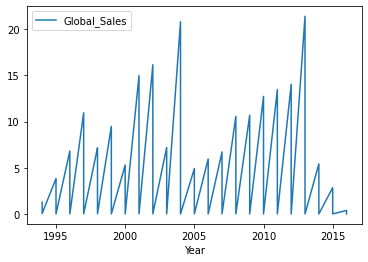

In [59]:
fig = df_ps.plot(x="Year", y="Global_Sales")


In [80]:
print(df_n["Global_Sales"].max())
print(df_n["Global_Sales"].min())
sales_stat = {"mean": df_n["Global_Sales"].mean(),
            "median": df_n["Global_Sales"].median(),
            "mode": df_n["Global_Sales"].mode().to_list(),
            }
sales_stat

82.74
0.01


{'mean': 0.5409103185808114, 'median': 0.17, 'mode': [0.02]}

In [81]:
print(df_n["Global_Sales"].quantile(0.95))

2.05


In [82]:
print(df_n["Global_Sales"][df_n.Global_Sales > 2.05].count())

811
